In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from loadmodules import *

datadir = "/home/pdcg/Documents/post_process_routines/"
clusterparray = 'phip_fullicmf/'

In [3]:
sf = load_subfind(128, dir=datadir+clusterparray, loadonly=['fpos', 'slty', 'frc2', 'svel', 'sidm', 'smty', 'spos', 'fnsh', 'flty', 'slty', 'ffsh'] )
s = gadget_readsnap(128, snappath=datadir+clusterparray, loadonlytype=[0,4], subfind=sf, applytransformationfacs=True)

/home/pdcg/pylib/gadget_subfind.py:443: H5pyDeprecationWarning: Using astype() as a context manager is deprecated. Slice the returned object instead, like: ds.astype(np.int32)[:10]
  with dset.astype('int64'):
/home/pdcg/pylib/gadget_snap.py:707: H5pyDeprecationWarning: Using astype() as a context manager is deprecated. Slice the returned object instead, like: ds.astype(np.int32)[:10]
  with dset.astype('uint64'):


In [4]:
s.calc_sf_indizes(sf)
center = sf.data['spos'][0,:].astype('f8')

In [5]:
rot_matrix = s.select_halo(sf)

galrad= 0.02135690748691559
Found 141250 stars.


In [6]:
mask_gas = s.data['type']==0
mask_stars = s.data['type']==4
mask_clusters = s.data['nclt'] > 0
mask_clusters_init = s.data['incl'] > 0

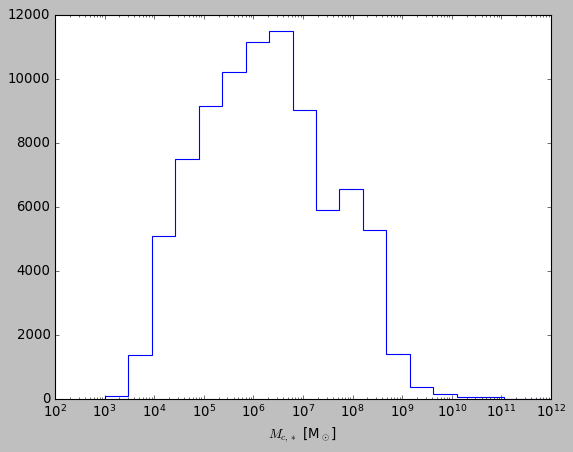

In [9]:
bins = np.logspace(3,12,20)
solar_mass_g = 1.989e33
plt.hist(s.data['mtrc'][mask_clusters]* s.UnitMass_in_g/solar_mass_g, bins=bins, histtype='step')
plt.xlabel(r'$M_{c,\ast}$ [M$_\odot$]')
plt.xscale('log')

KeyError: 'lsfe'

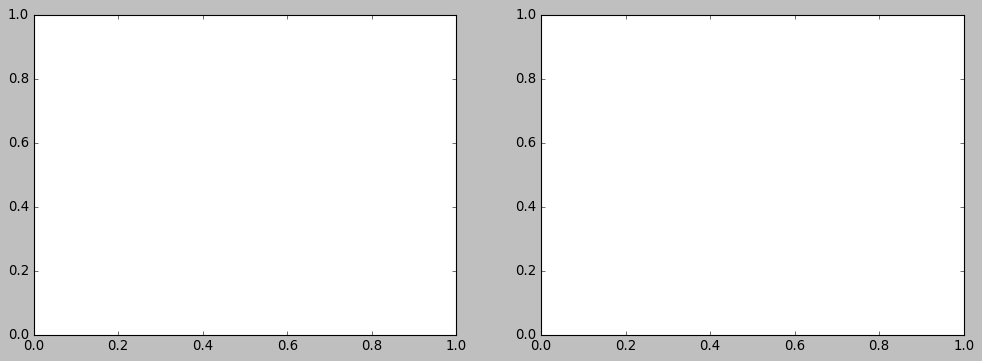

In [10]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
counts1, bins1 = np.histogram(s.data['lcfe'][mask_clusters])
counts2, bins2 = np.histogram(s.data['lsfe'][mask_clusters])
ax1.stairs(counts1, bins1)
ax2.stairs(counts2, bins2)

In [8]:
gyr = 3.15576e16 # in s
s.data['r'] = np.sqrt(s.data['pos'][:,0]**2 + s.data['pos'][:,1]**2 + s.data['pos'][:,2]**2)
s.data['l1'] = s.data['tijl'][:,0] * (gyr /(s.UnitLength_in_cm/s.UnitVelocity_in_cm_per_s))**2 * s.hubbleparam**2/ s.time**3
s.data['l2'] = s.data['tijl'][:,1] * (gyr /(s.UnitLength_in_cm/s.UnitVelocity_in_cm_per_s))**2 * s.hubbleparam**2/ s.time**3
s.data['l3'] = s.data['tijl'][:,2] * (gyr /(s.UnitLength_in_cm/s.UnitVelocity_in_cm_per_s))**2 * s.hubbleparam**2/ s.time**3
s.data['T_strenght'] = s.data['l1'] - 1/3 * (s.data['l1'] + s.data['l2'] + s.data['l3'])

/tmp/ipykernel_47884/3328098917.py:6: RuntimeWarning: invalid value encountered in add
  s.data['T_strenght'] = s.data['l1'] - 1/3 * (s.data['l1'] + s.data['l2'] + s.data['l3'])
/tmp/ipykernel_47884/3328098917.py:6: RuntimeWarning: invalid value encountered in subtract
  s.data['T_strenght'] = s.data['l1'] - 1/3 * (s.data['l1'] + s.data['l2'] + s.data['l3'])


(-50.0, 50.0)

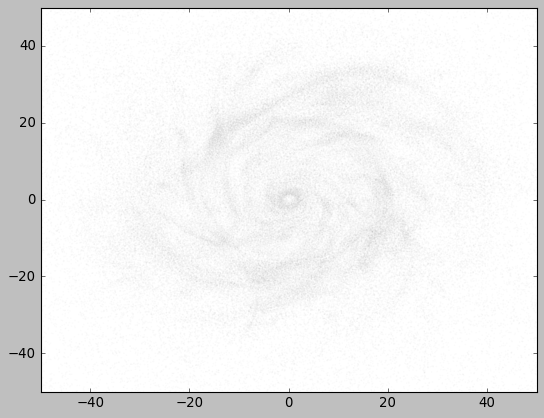

In [14]:
plt.scatter(s.data['pos'][mask_gas,0]*1e3, s.data['pos'][mask_gas,1]*1e3, c=s.data['T_strenght'][mask_gas], alpha=0.01, edgecolor=None, s=0.5)
plt.xlim(-50,50)
plt.ylim(-50,50)

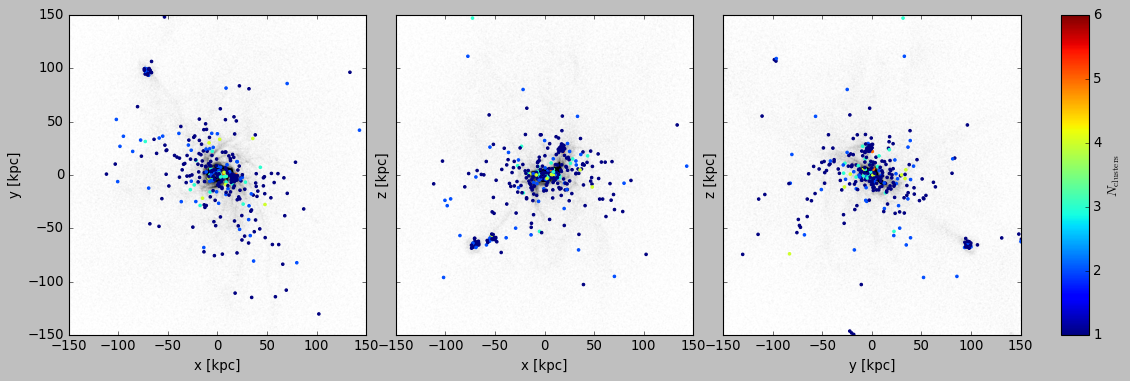

In [8]:
fig, ax = plt.subplots(1, 3 ,figsize=(17,5), sharey=True)
ax[0].scatter(s.data['pos'][mask_gas,0]*1e3, s.data['pos'][mask_gas,1]*1e3, c=s.data['rho'], alpha=0.01, edgecolor=None, s=0.1)
ax[0].scatter(s.data['pos'][mask_stars][mask_clusters,0]*1e3, s.data['pos'][mask_stars][mask_clusters,1]*1e3, c=s.data['nclt'][mask_clusters], s=5, edgecolors='face')
ax[1].scatter(s.data['pos'][mask_gas,0]*1e3, s.data['pos'][mask_gas,2]*1e3, c=s.data['rho'], alpha=0.01, edgecolor=None, s=0.1)
ax[1].scatter(s.data['pos'][mask_stars][mask_clusters,0]*1e3, s.data['pos'][mask_stars][mask_clusters,2]*1e3, c=s.data['nclt'][mask_clusters], s=5, edgecolors='face')
ax[2].scatter(s.data['pos'][mask_gas,1]*1e3, s.data['pos'][mask_gas,2]*1e3, c=s.data['rho'], alpha=0.01, edgecolor=None, s=0.1)
im = ax[2].scatter(s.data['pos'][mask_stars][mask_clusters,1]*1e3, s.data['pos'][mask_stars][mask_clusters,2]*1e3, c=s.data['nclt'][mask_clusters], s=5, edgecolors='face')
ax[0].set(xlim=(-150,150), ylim=(-150,150), xlabel='x [kpc]', ylabel='y [kpc]')
ax[1].set(xlim=(-150,150), ylim=(-150,150), xlabel='x [kpc]', ylabel='z [kpc]')
ax[2].set(xlim=(-150,150), ylim=(-150,150), xlabel='y [kpc]', ylabel='z [kpc]')
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.1, hspace=0.02)
cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label(r'$N_\mathrm{clusters}$')
plt.savefig('zoomin_wclustersfinal.png')

In [9]:
redshift = (1/s.data['age'][mask_clusters]) - 1 

(array([ 92.,  57.,  38.,  38.,  18.,  58., 127.,  96., 276., 264.]),
 array([ 4.90504265,  5.75548077,  6.60591888,  7.45635653,  8.30679512,
         9.15723228, 10.0076704 , 10.85810852, 11.70854664, 12.55898476,
        13.40942287]),
 <BarContainer object of 10 artists>)

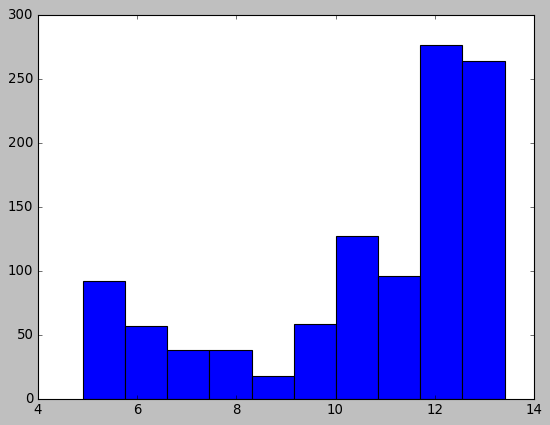

In [10]:
cluster_ages = s.cosmology_get_lookback_time_from_a(s.data['age'][mask_clusters], is_flat=True)
plt.hist(cluster_ages, weights=s.data['nclt'][mask_clusters])

(array([1.139e+03, 2.320e+02, 6.800e+01, 2.400e+01, 3.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-5.25691903e-13,  4.63124271e-03,  9.26248543e-03,  1.38937291e-02,
         1.85249709e-02,  2.31562145e-02,  2.77874582e-02,  3.24187018e-02,
         3.70499417e-02,  4.16811854e-02,  4.63124290e-02]),
 <BarContainer object of 10 artists>)

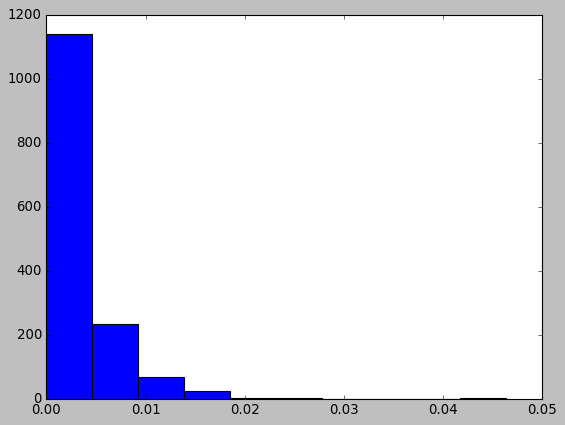

In [11]:
plt.hist(s.data['gz'][mask_stars][mask_clusters], weights=s.data['nclt'][mask_clusters])

In [12]:
s.data['bpos'] -= center
s.rotate_value('bpos', matrix= rot_matrix)

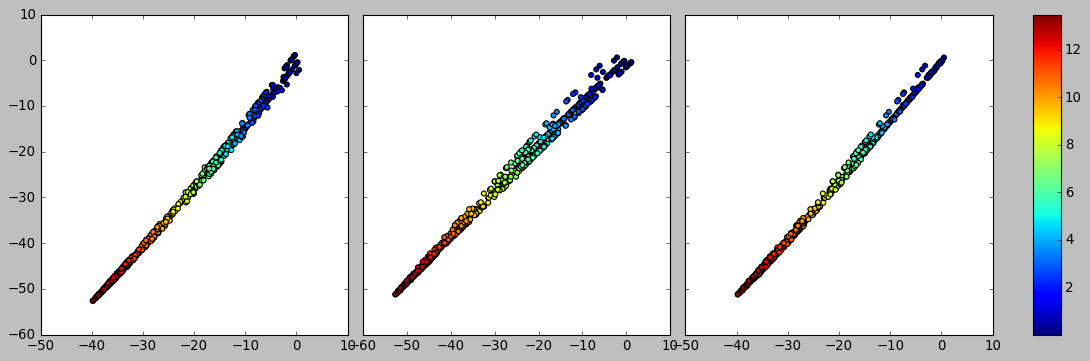

In [13]:
fig, ax = plt.subplots(1, 3 ,figsize=(17,5), sharey=True)
# ax[0].scatter(s.data['bpos'][:,0], s.data['bpos'][:,1], alpha=0.01, c=s.data['bdens'],edgecolor=None, s=0.1)
ax[0].scatter(s.data['bpos'][mask_clusters,0], s.data['bpos'][mask_clusters,1], c=cluster_ages, edgecolor=None)
# ax[1].scatter(s.data['bpos'][:,1], s.data['bpos'][:,2], alpha=0.01, c=s.data['bdens'],edgecolor=None, s=0.1)
ax[1].scatter(s.data['bpos'][mask_clusters,1], s.data['bpos'][mask_clusters,2], c=cluster_ages, edgecolor=None)
# ax[2].scatter(s.data['bpos'][:,0], s.data['bpos'][:,2], alpha=0.01, c=s.data['bdens'],edgecolor=None, s=0.1)
im = ax[2].scatter(s.data['bpos'][mask_clusters,0], s.data['bpos'][mask_clusters,2], c=cluster_ages, edgecolor=None)
# ax[0].set(xlim=(-5,5), ylim=(-5,5))
# ax[1].set(xlim=(-5,5), ylim=(-5,5))
# ax[2].set(xlim=(-5,5), ylim=(-5,5))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.05, hspace=0.02)
cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

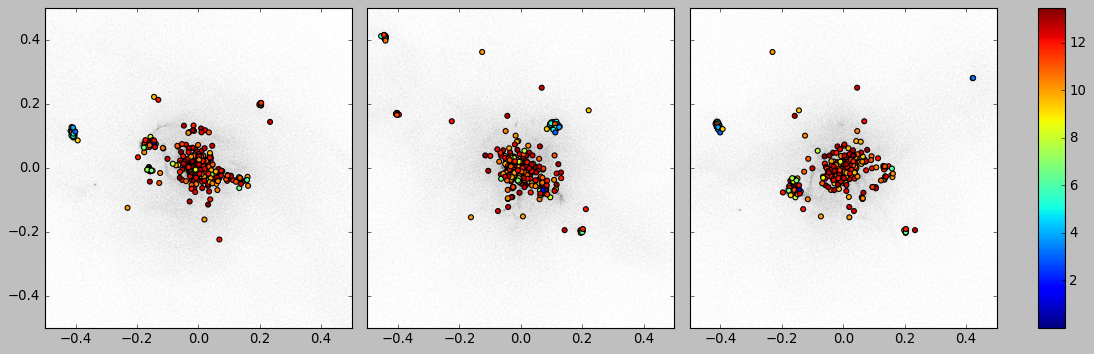

In [14]:
fig, ax = plt.subplots(1, 3 ,figsize=(17,5), sharey=True)
ax[0].scatter(s.data['pos'][mask_gas,0], s.data['pos'][mask_gas,1], c=s.data['rho'], alpha=0.01, edgecolor=None, s=0.1)
ax[0].scatter(s.data['pos'][mask_stars][mask_clusters,0], s.data['pos'][mask_stars][mask_clusters,1], c=cluster_ages, edgecolor=None)
ax[1].scatter(s.data['pos'][mask_gas,1], s.data['pos'][mask_gas,2], c=s.data['rho'], alpha=0.01, edgecolor=None, s=0.1)
ax[1].scatter(s.data['pos'][mask_stars][mask_clusters,1], s.data['pos'][mask_stars][mask_clusters,2], c=cluster_ages, edgecolor=None)
ax[2].scatter(s.data['pos'][mask_gas,0], s.data['pos'][mask_gas,2], c=s.data['rho'], alpha=0.01, edgecolor=None, s=0.1)
im = ax[2].scatter(s.data['pos'][mask_stars][mask_clusters,0], s.data['pos'][mask_stars][mask_clusters,2], c=cluster_ages, edgecolor=None)
ax[0].set(xlim=(-0.5,0.5), ylim=(-0.5,0.5))
ax[1].set(xlim=(-0.5,0.5), ylim=(-0.5,0.5))
ax[2].set(xlim=(-0.5,0.5), ylim=(-0.5,0.5))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.05, hspace=0.02)
cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

In [15]:
def ICMF(m, mtrunc):
    return np.exp(-m/mtrunc)/m**2

def trapz_log(min, max, mtrunc, IMF, n):
    integral = 0.
    h = (np.log10(max) - np.log10(min))/n
    low = np.log10(min)
    for i in range(n):
        current = 10**(low + i*h)
        next = 10**(low + (i+1)*h)
        dx = abs(current - next)
        integral += 0.5*dx*(IMF(current, mtrunc) + IMF(next, mtrunc))
    return integral

In [16]:
min = 5e3
max = 1e8
marray = np.logspace(np.log10(min), np.log10(max), 50)

In [17]:
mtrunc = s.data['mtrc'][mask_clusters] * s.UnitMass_in_g/solar_mass_g
icmf_norm = 1/trapz_log(min, max, mtrunc, ICMF, 500)
ICMF_array=[]

for i in range(len(mtrunc)):
    ICMF_array.append(icmf_norm[i] * ICMF(marray, mtrunc[i]))

ICMF_array = np.array(ICMF_array)

In [18]:
mclus = s.data['imcl'][mask_clusters].flatten()

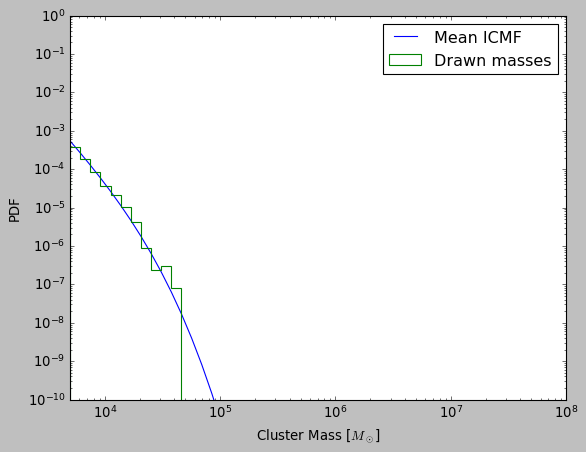

In [19]:
plt.loglog(marray, ICMF_array.mean(axis=0), label='Mean ICMF')
plt.hist(mclus[mclus>0] * s.UnitMass_in_g/solar_mass_g, bins=marray, density=True, histtype='step', label='Drawn masses')
plt.legend()
plt.ylim(1e-10, 1e0)
plt.xlim(min, max)
plt.xlabel(r'Cluster Mass [$M_\odot$]')
plt.ylabel('PDF')
plt.savefig('icmf_sampling_test.pdf')

In [ ]:
number_total_clusters = []
number_wrapper_clusters = []
for i in range(21,128):
    s = gadget_readsnap(i, snappath=datadir+clusterparray, loadonlytype=[4])
    mask_clusters1 = s.data['cfon']>0
    mask_clusters2 = s.data['nclt']>0
    mask_leak = (s.data['cfon']>0) & (s.data['nclt']<1)
    if any(mask_leak):
        break
    number_wrapper_clusters.append(s.data['nclt'][mask_clusters1].size)
    number_total_clusters.append(s.data['nclt'][mask_clusters2].sum())

number_total_clusters = np.array(number_total_clusters)

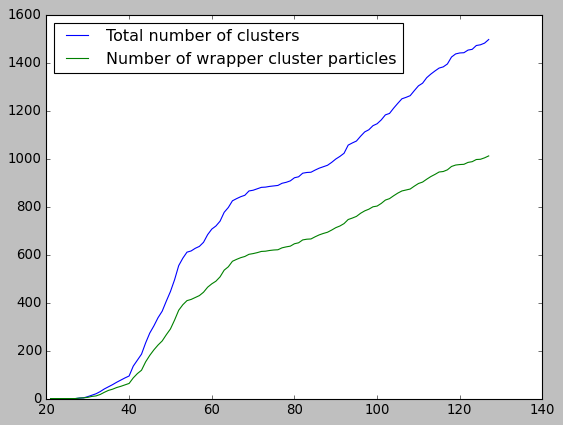

In [34]:
plt.plot(np.arange(21,128,1), number_total_clusters, label='Total number of clusters')
plt.plot(np.arange(21,128,1), number_wrapper_clusters, label='Number of wrapper cluster particles')
plt.legend(loc=2)